<a href="https://colab.research.google.com/github/Revanth0811/fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [35]:
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train,X_test = X_train / 255.0, X_test / 255.0

# Check dataset shape
print(f"Train images shape: {X_train.shape}")
print(f"Test images shape: {X_test.shape}")


Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [36]:
print(X_train[0].shape)

(28, 28)


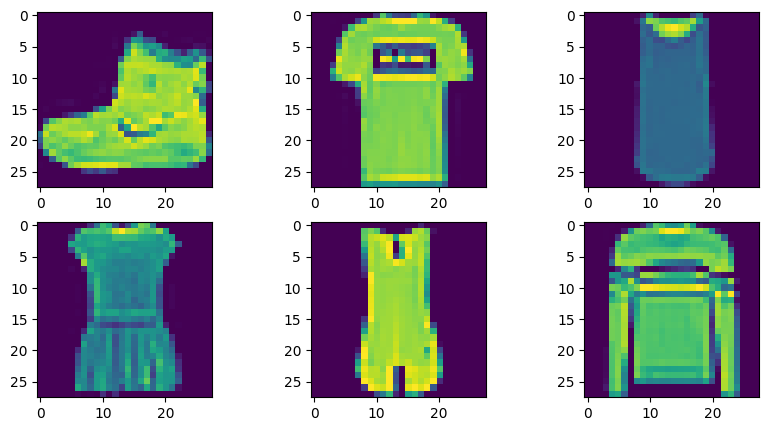

In [37]:
plt.figure(figsize=(10,5))
for i in range(6):
  plt.subplot(2,3,i+1)
  img=X_train[i]
  plt.imshow(img)
plt.show()

In [38]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

n_classes=10

In [39]:
# ONE HOT ENCODING
print("shape before ohe :",y_train.shape)

Y_train=tf.keras.utils.to_categorical(y_train,n_classes)
Y_test=tf.keras.utils.to_categorical(y_test,n_classes)

print("shape after ohe :",Y_train.shape)


shape before ohe : (60000,)
shape after ohe : (60000, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 75ms/step - accuracy: 0.6209 - loss: 1.0202 - val_accuracy: 0.8357 - val_loss: 0.4349
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 72ms/step - accuracy: 0.8247 - loss: 0.4789 - val_accuracy: 0.8648 - val_loss: 0.3665
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 77ms/step - accuracy: 0.8538 - loss: 0.4067 - val_accuracy: 0.8819 - val_loss: 0.3289
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.8665 - loss: 0.3695 - val_accuracy: 0.8844 - val_loss: 0.3150
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 78ms/step - accuracy: 0.8734 - loss: 0.3503 - val_accuracy: 0.8925 - val_loss: 0.2926
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.8771 - loss: 0.3366 - val_accuracy: 0.8927 - val_loss: 0.2950
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 71ms/step - accuracy: 0.8840 - loss: 0.3187 - val_accuracy: 0.8973 - val_loss: 0.2804
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 75ms/step - accuracy: 0.8890 - loss: 0.3054 - 

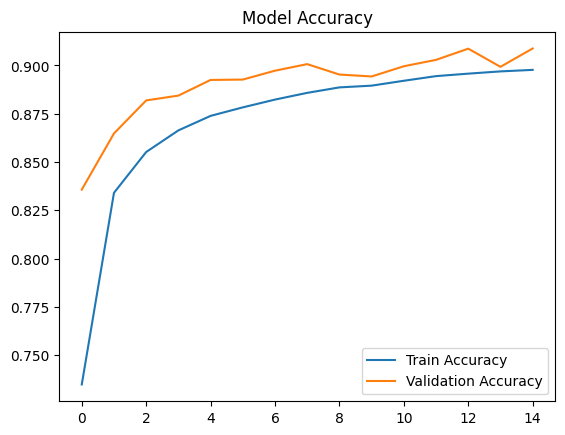

In [40]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist



# Building CNN Model with Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=15, batch_size=64, validation_data=(X_test, Y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_labels=dict(zip(range(0,10),class_names))

batch=X_test[:10]
labels=np.argmax(Y_test[:10],axis=1)

predictions=model.predict(batch,verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [42]:
print(predictions)

[[7.65685597e-14 1.12396508e-13 8.20146143e-13 3.65277537e-14
  3.42118017e-13 1.21253697e-06 4.36606046e-13 1.56546175e-05
  4.34836065e-12 9.99983132e-01]
 [1.35701399e-07 1.73480140e-13 9.99881804e-01 6.26634022e-10
  8.79453801e-05 8.65418390e-15 2.99942767e-05 4.07586914e-20
  1.02855580e-09 1.32400673e-15]
 [3.19137810e-13 9.99999940e-01 5.65307968e-15 3.49404940e-13
  7.89182020e-14 6.43568680e-22 2.37534618e-14 3.59613682e-25
  2.00334806e-16 2.13771137e-21]
 [7.42264722e-11 9.99999940e-01 9.93893661e-13 2.32996888e-09
  2.05840917e-11 1.04739437e-17 4.52635221e-11 6.49226197e-19
  3.06841006e-13 6.70280266e-17]
 [3.34283203e-01 1.44425376e-05 3.65427919e-02 1.45630287e-02
  1.76000297e-02 2.32668516e-08 5.96938550e-01 1.98840597e-10
  5.78165018e-05 8.00935318e-09]
 [3.53335937e-11 9.99999940e-01 3.91012092e-13 6.84013679e-11
  5.58682354e-12 2.16593521e-18 8.29660212e-12 1.07605747e-21
  1.15955233e-13 1.93279704e-18]
 [4.37633753e-06 6.97651728e-07 1.51853915e-02 1.07699475e

In [43]:
for image in predictions:
  print(np.sum(image))

1.0
0.9999999
0.99999994
0.99999994
0.9999999
0.99999994
0.99999994
1.0
0.99999994
0.9999999


In [44]:
class_result=np.argmax(predictions,axis=1)
print(class_result)

[9 2 1 1 6 1 4 6 5 7]


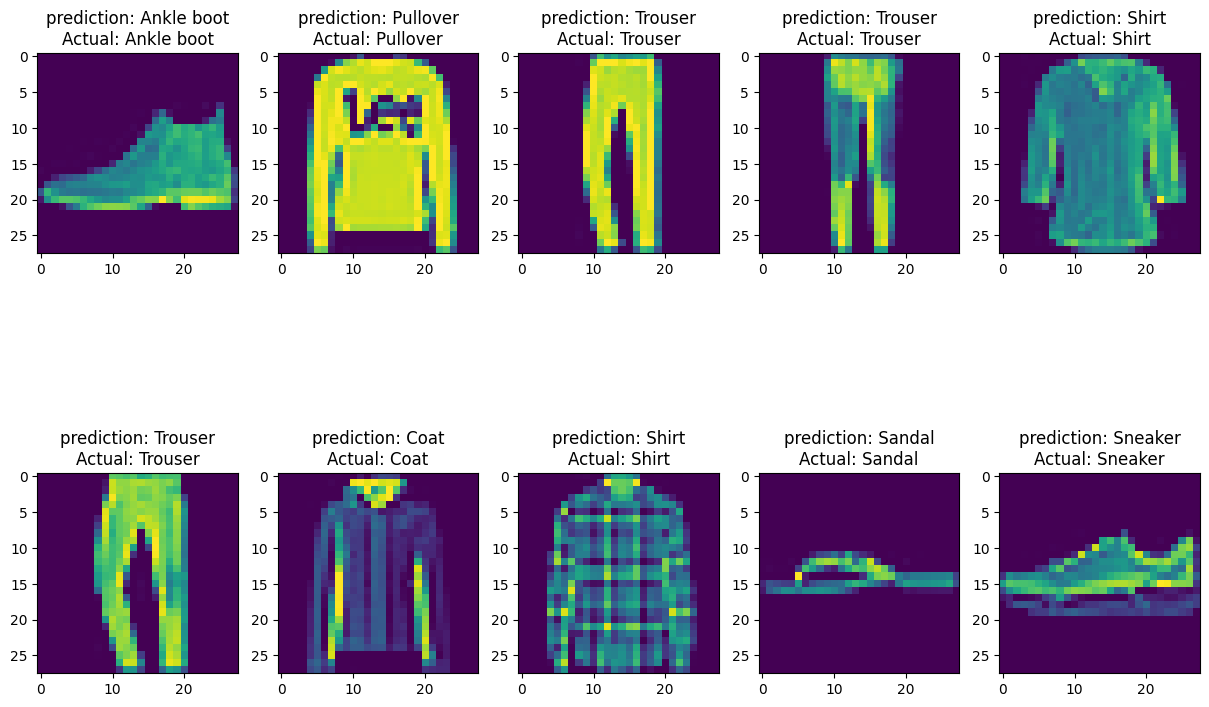

In [45]:
fig,ax=plt.subplots(2,5,figsize=(15,10))
ax=ax.flatten()

for i,img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i]==key:
      title="prediction: {}\nActual: {}".format(class_labels[key],class_labels[labels[i]])
      ax[i].set_title(title)
  ax[i].imshow(img)

plt.show()

In [47]:
print(Y_test.shape)
print(y_test.shape)

(10000, 10)
(10000,)


In [48]:
y_pred=np.argmax(predictions,axis=1)
print(y_pred.shape)

(10,)


In [54]:
predict=model.predict(X_test,verbose=1)
label=np.argmax(predict,axis=1).reshape(10000,1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [60]:
y_test=y_test.reshape(10000,1)
y_test.shape

(10000, 1)

In [63]:
print("No of incorrectly classified images: ",np.sum(label!=y_test))

No of incorrectly classified images:  912


In [67]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,label)

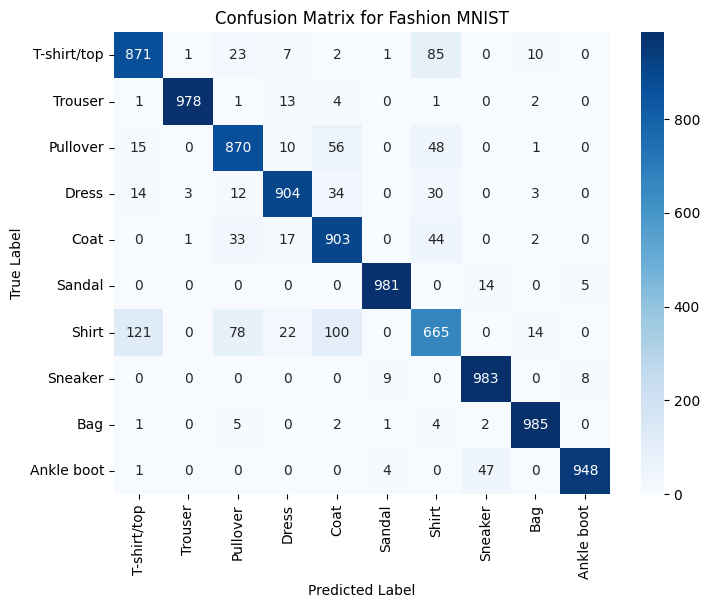

In [70]:
import seaborn as sns
#confusion matrix visualization using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Fashion MNIST")
plt.show()